In [2]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [65]:
df_conners = pd.read_csv('Data/df_connors', index_col=[0])
df_behavioral = pd.read_csv('Data/df_behavioral', index_col=[0])
df_eeg = pd.read_csv('Data/df_eeg', index_col=[0])
df_analysis = pd.read_csv('Data/df_analysis', index_col=[0])
print(df_conners.dtypes)
print(df_behavioral.dtypes)
print(df_eeg.dtypes)


id          int64
Gender      int64
cIM       float64
cHR       float64
cIE       float64
cSC       float64
dtype: object
id           int64
Gender       int64
Aqtot      float64
Aqaudi     float64
Aqvis      float64
RCQtot     float64
RCQaudi    float64
RCQvis     float64
dtype: object
id                     int64
Gender                 int64
brain_oscillation     object
electrode             object
fft_abs_power        float64
dtype: object


We can observe that ids and Gender are considered as integers so we need to re-adjust for all three dframes

In [68]:
df_conners['id'] = df_conners['id'].apply(str)
df_conners['Gender'] = df_conners['Gender'].apply(str)
df_behavioral['id'] = df_behavioral['id'].apply(str)
df_behavioral['Gender'] = df_behavioral['Gender'].apply(str)
df_eeg['id'] = df_eeg['id'].apply(str)
df_eeg['Gender'] = df_eeg['Gender'].apply(str)
df_analysis['Gender'] = df_analysis['Gender'].apply(str)
print(df_conners.dtypes)
print(df_behavioral.dtypes)
print(df_eeg.dtypes)

id         object
Gender     object
cIM       float64
cHR       float64
cIE       float64
cSC       float64
dtype: object
id          object
Gender      object
Aqtot      float64
Aqaudi     float64
Aqvis      float64
RCQtot     float64
RCQaudi    float64
RCQvis     float64
dtype: object
id                    object
Gender                object
brain_oscillation     object
electrode             object
fft_abs_power        float64
dtype: object


### First, let's look at our Conners data 

In [5]:
df_conners

,id,Gender,cIM,cHR,cIE,cSC
0,1,1,17.0,31.0,29.0,9.0
1,3,1,10.0,5.0,13.0,1.0
2,4,1,26.0,17.0,7.0,15.0
3,7,1,24.0,8.0,6.0,14.0
5,11,1,16.0,26.0,13.0,10.0
...,...,...,...,...,...,...
95,602,1,25.0,14.0,20.0,18.0
96,603,1,32.0,15.0,14.0,15.0
97,700,2,13.0,33.0,14.0,11.0
98,701,1,22.0,17.0,15.0,12.0


In [6]:
df_conners.describe()

,cIM,cHR,cIE,cSC
count,96.000000,96.000000,96.000000,96.000000
mean,21.843750,17.687500,14.479167,9.645833
std,6.695369,7.646551,7.014240,4.262392
min,5.000000,3.000000,2.000000,0.000000
25%,18.000000,12.750000,8.750000,7.000000
50%,23.000000,17.000000,15.000000,10.000000
75%,26.250000,24.000000,18.000000,12.000000
max,33.000000,33.000000,30.000000,18.000000


In [7]:
df_conners.groupby(['Gender']).describe()

cIM                                                     cHR  \
       count       mean       std  min   25%   50%   75%   max count   
Gender                                                                 
1       57.0  22.701754  5.669357  8.0  19.0  23.0  27.0  32.0  57.0   
2       39.0  20.589744  7.873065  5.0  15.5  21.0  26.0  33.0  39.0   

                   ...   cIE         cSC                                       \
             mean  ...   75%   max count       mean       std  min  25%   50%   
Gender             ...                                                          
1       15.122807  ...  20.0  30.0  57.0  11.245614  4.115653  1.0  9.0  12.0   
2       21.435897  ...  17.0  30.0  39.0   7.307692  3.317845  0.0  5.0   8.0   

                    
         75%   max  
Gender              
1       15.0  18.0  
2       10.0  12.0  

[2 rows x 32 columns]

### Now, let's look at our behavioral data

In [8]:
df_behavioral

,id,Gender,Aqtot,Aqaudi,Aqvis,RCQtot,RCQaudi,RCQvis
0,1,1,90.0,91.0,92.0,94.0,80.0,110.0
1,3,1,27.0,34.0,41.0,25.0,31.0,38.0
2,4,1,93.0,89.0,96.0,90.0,92.0,90.0
3,7,1,86.0,66.0,112.0,94.0,90.0,100.0
5,11,1,45.0,33.0,78.0,69.0,51.0,94.0
...,...,...,...,...,...,...,...,...
95,602,1,80.0,87.0,77.0,71.0,71.0,79.0
96,603,1,111.0,103.0,118.0,63.0,78.0,56.0
97,700,2,83.0,80.0,89.0,70.0,72.0,75.0
98,701,1,0.0,20.0,0.0,29.0,32.0,42.0


In [9]:
df_behavioral.describe()

,Aqtot,Aqaudi,Aqvis,RCQtot,RCQaudi,RCQvis
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,81.489583,83.479167,83.302083,71.729167,76.593750,73.614583
std,26.171095,25.191469,27.854932,24.971343,22.582983,24.589844
min,0.000000,0.000000,0.000000,16.000000,19.000000,8.000000
25%,70.500000,73.750000,69.750000,55.750000,60.000000,55.750000
50%,86.500000,89.000000,89.500000,70.500000,79.500000,73.500000
75%,101.000000,100.250000,104.250000,92.250000,92.500000,94.000000
max,125.000000,127.000000,121.000000,125.000000,132.000000,122.000000


In [10]:
df_behavioral.groupby(['Gender']).describe()

Aqtot                                                       Aqaudi  \
       count       mean        std   min   25%   50%    75%    max  count   
Gender                                                                      
1       57.0  82.350877  24.860677   0.0  74.0  88.0  101.0  116.0   57.0   
2       39.0  80.230769  28.262362  21.0  62.5  83.0  100.5  125.0   39.0   

                   ... RCQaudi        RCQvis                                   \
             mean  ...     75%    max  count       mean       std   min   25%   
Gender             ...                                                          
1       83.122807  ...    90.0  122.0   57.0  74.614035  24.45824  33.0  56.0   
2       84.000000  ...    95.5  132.0   39.0  72.153846  25.02792   8.0  55.5   

                           
         50%   75%    max  
Gender                     
1       67.0  94.0  122.0  
2       75.0  91.5  111.0  

[2 rows x 48 columns]

### Finally, let's look at our EEG data

In [11]:
df_eeg

,id,Gender,brain_oscillation,electrode,fft_abs_power
0,1,1,Delta,FP1,15.376173
54,1,1,Delta,FP2,16.585338
53,1,1,Delta,F7,7.968847
52,1,1,Delta,F3,9.749313
51,1,1,Delta,Fz,10.845292
...,...,...,...,...,...
5798,702,1,Beta,T6,10.614643
5797,702,1,Beta,O1,17.656688
5796,702,1,Beta,O2,16.284646
5803,702,1,Beta,FP2,8.058151


In [12]:
df_eeg.describe()

,fft_abs_power
count,7296.000000
mean,11.396554
std,11.859073
min,0.818976
25%,5.247675
50%,8.486325
75%,13.742931
max,258.114724


In [13]:
df_eeg.groupby(['brain_oscillation', 'electrode']).describe()

fft_abs_power                                  \
                                    count       mean        std       min   
brain_oscillation electrode                                                 
Alpha             C3                 96.0  14.816227  17.001913  1.640155   
                  C4                 96.0  14.669763  17.248843  1.663464   
                  Cz                 96.0  15.586763  13.987136  2.082466   
                  F3                 96.0   9.097565   7.023224  1.411774   
                  F4                 96.0   9.420172   7.477010  1.525239   
...                                   ...        ...        ...       ...   
Theta             Pz                 96.0  13.214703  10.196196  3.063776   
                  T3                 96.0   4.926751   2.438685  1.348965   
                  T4                 96.0   4.606512   2.811496  1.270426   
                  T5                 96.0   7.401085   5.304542  1.515561   
                  T6                 96.0   7.479236   6.146453  1.504450   

                                                                         
                                  25%        50%        75%         max  
brain_oscillation electrode                                              
Alpha             C3         4.807546   9.676305  19.787348  132.931736  
                  C4         4.967679  10.315598  18.882731  139.567341  
                  Cz         5.636457   9.985657  21.059070   73.813547  
                  F3         4.127160   7.111640  12.498701   43.748667  
                  F4         4.126991   7.350092  12.511781   48.174317  
...                               ...        ...        ...         ...  
Theta             Pz         7.128709  10.451407  16.044085   75.112935  
                  T3         3.158237   4.587008   6.048268   15.712028  
                  T4         2.903782   4.095120   5.388330   21.130068  
                  T5         4.096981   5.933580   9.095018   34.811888  
                  T6         4.010882   5.795402   8.583667   47.399760  

[76 rows x 8 columns]

In [14]:
# Let's also look ar our EEG absolute power mean for each of the 4 wavebands
df_eeg.groupby(['brain_oscillation']).describe()

fft_abs_power                                            \
                          count       mean        std       min       25%   
brain_oscillation                                                           
Alpha                    1824.0  13.510130  19.448280  0.818976  3.836552   
Beta                     1824.0   9.953982   8.614105  1.319401  5.128904   
Delta                    1824.0  13.124887   7.151613  2.363218  8.232837   
Theta                    1824.0   8.997216   6.625504  1.270426  4.744958   

                                                     
                         50%        75%         max  
brain_oscillation                                    
Alpha               7.152935  14.909275  258.114724  
Beta                7.700207  12.126437  120.919824  
Delta              11.709032  16.450285   83.603697  
Theta               7.298007  11.014870   75.112935

### We've looked at our means, counts, standard deviations, now let's visualize our distributions and measure their normality

#### Normality is measured using the Shapiro-Wilk test. If the returned value has a p < 0,05; the null hypothesis is rejected, pointing towards a non-normal distribution 
#### Let's start with the Connors dataset

(0.9643755555152893, 0.01037133950740099)

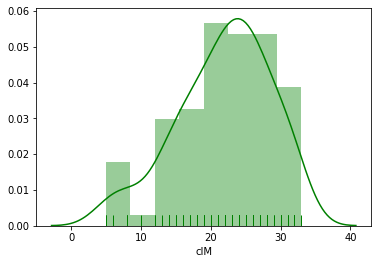

In [15]:
# Plot distribution
sns.distplot(df_conners['cIM'], color='green', rug=True)
# Test data normality
stats.shapiro(df_conners['cIM'])

(0.9751029014587402, 0.06430380046367645)

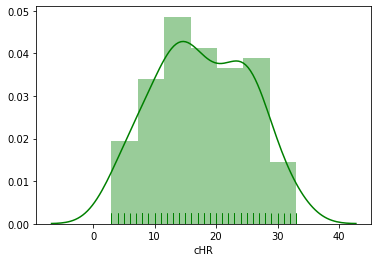

In [16]:
# Plot distribution
sns.distplot(df_conners['cHR'], color='green', rug=True)
# Test data normality
stats.shapiro(df_conners['cHR'])

(0.9726588726043701, 0.04209471866488457)

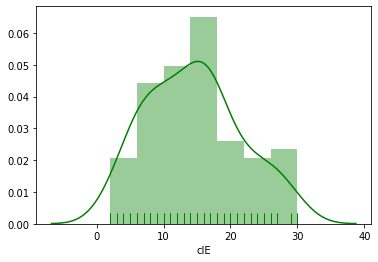

In [17]:
# Plot distribution
sns.distplot(df_conners['cIE'], color='green', rug=True)
# Test data normality
stats.shapiro(df_conners['cIE'])

(0.9814964532852173, 0.19415085017681122)

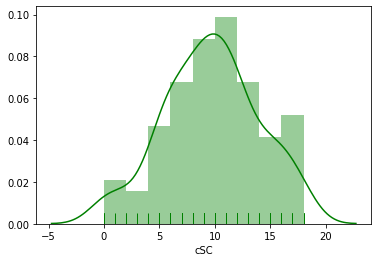

In [18]:
# Plot distribution
sns.distplot(df_conners['cSC'], color='green', rug=True)
# Test data normality
stats.shapiro(df_conners['cSC'])

#### As we can see, half of our conners data is normally distributed, half is not. 
#### Now, let's look at it for our behavioral measure

(0.9379427433013916, 0.00019920496561098844)

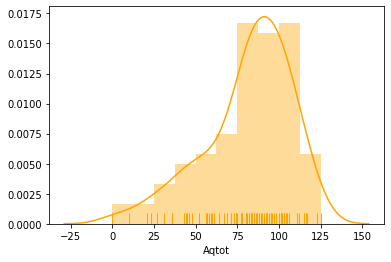

In [19]:
# Plot distribution
sns.distplot(df_behavioral['Aqtot'], color='orange', rug=True)
# Test data normality
stats.shapiro(df_behavioral['Aqtot'])

(0.927827775478363, 5.3235096856951714e-05)

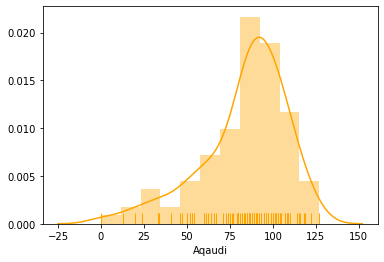

In [20]:
# Plot distribution
sns.distplot(df_behavioral['Aqaudi'], color='orange', rug=True)
# Test data normality
stats.shapiro(df_behavioral['Aqaudi'])

(0.9181770086288452, 1.639702168176882e-05)

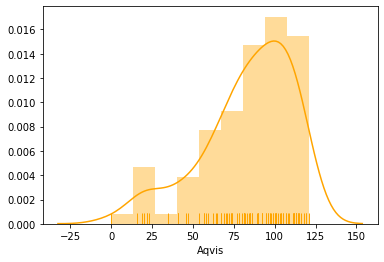

In [21]:
# Plot distribution
sns.distplot(df_behavioral['Aqvis'], color='orange', rug=True)
# Test data normality
stats.shapiro(df_behavioral['Aqvis'])

(0.9860579967498779, 0.4066457152366638)

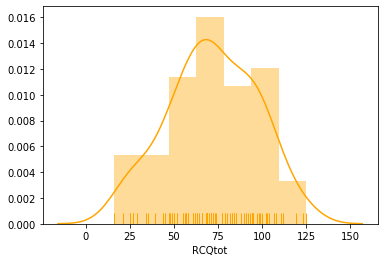

In [22]:
# Plot distribution
sns.distplot(df_behavioral['RCQtot'], color='orange', rug=True)
# Test data normality
stats.shapiro(df_behavioral['RCQtot'])

(0.9945135712623596, 0.9662332534790039)

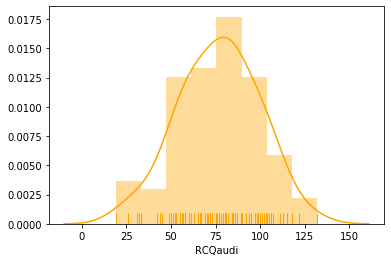

In [23]:
# Plot distribution
sns.distplot(df_behavioral['RCQaudi'], color='orange', rug=True)
# Test data normality
stats.shapiro(df_behavioral['RCQaudi'])

(0.9807149767875671, 0.16997645795345306)

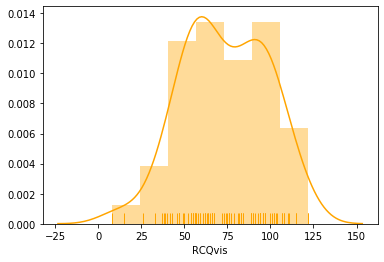

In [24]:
# Plot distribution
sns.distplot(df_behavioral['RCQvis'], color='orange', rug=True)
# Test data normality
stats.shapiro(df_behavioral['RCQvis'])

#### The Attentionnal quotient (Aq) are not normally distributed, but the Response control quotient (RCQ) is. 
#### Finally, let's look at the eeg distribution, although it should not be normally distributed. Based on  general litterature, there should be increasingly higher power for lower wavebands

C:\Users\Admin\anaconda3\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.5810763835906982, 0.0)

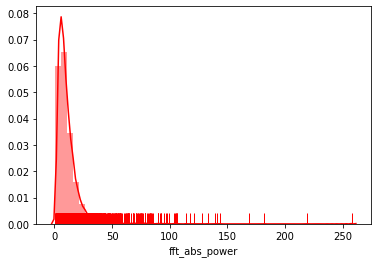

In [25]:
# Plot distribution
sns.distplot(df_eeg['fft_abs_power'], color='red', rug=True)
# Test data normality
stats.shapiro(df_eeg['fft_abs_power'])

#### In the case of eeg data, we are more interested in the mean amplitude of each waveband. 

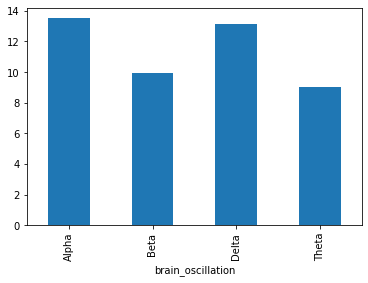

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

data = df_eeg
avg_abs_power = data.groupby('brain_oscillation')['fft_abs_power'].agg('mean')
avg_abs_power.plot(kind='bar')
plt.show()


#### Eeg data would be more interesting if we knew more about the waveband's mean absolute power for each electrode

In [27]:
# getting fft_abs_power for each waveband separately 

alpha1 = df_eeg.loc[df_eeg['brain_oscillation'] == 'Alpha']
alpha = alpha1[['electrode','fft_abs_power']]
beta1 = df_eeg.loc[df_eeg['brain_oscillation'] == 'Beta']
beta = beta1[['electrode','fft_abs_power']]
delta1 = df_eeg.loc[df_eeg['brain_oscillation'] == 'Delta']
delta = delta1[['electrode','fft_abs_power']]
theta1 = df_eeg.loc[df_eeg['brain_oscillation'] == 'Theta']
theta = theta1[['electrode','fft_abs_power']]


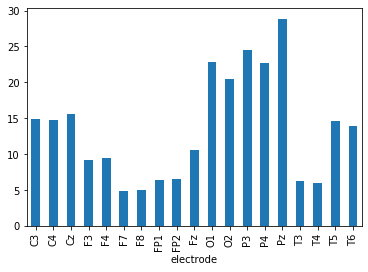

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

data = alpha
avg_abspow_by_electro = data.groupby('electrode')['fft_abs_power'].agg('mean')
avg_abspow_by_electro.plot.bar()
plt.show()

#### As we can see; alpha waves are more importantly present at posterior electrodes (O1/O2, P3/P4, Pz).

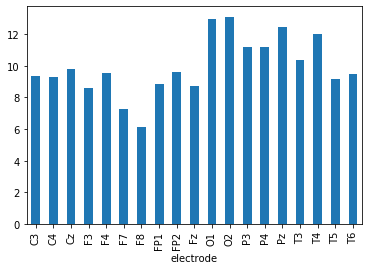

In [29]:
data = beta
avg_abspow_by_electro = data.groupby('electrode')['fft_abs_power'].agg('mean')
avg_abspow_by_electro.plot.bar()
plt.show()

#### Beta waves seem to be a little bit more homogenously distributed, with more power on the back half on the brain.

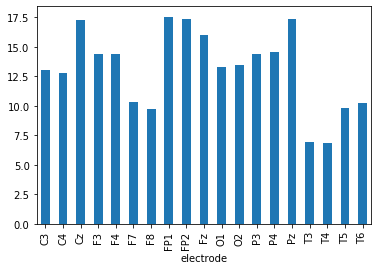

In [30]:
data = delta
avg_abspow_by_electro = data.groupby('electrode')['fft_abs_power'].agg('mean')
avg_abspow_by_electro.plot.bar()
plt.show()

#### Delta waves seem to be more central and posterior

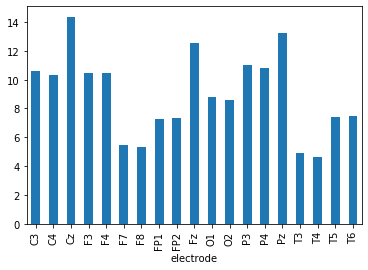

In [31]:
data = theta
avg_abspow_by_electro = data.groupby('electrode')['fft_abs_power'].agg('mean')
avg_abspow_by_electro.plot.bar()
plt.show()

### And finally, theta waves are also central and posterior

### We can also investigate the way the different features relate to each other

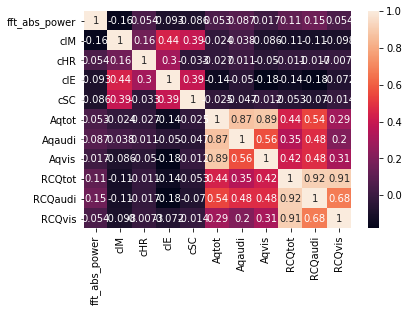

In [72]:
df_alpha = df_analysis.loc[df_analysis['brain_oscillation'] == 'Alpha']
corrMatrix = df_alpha.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

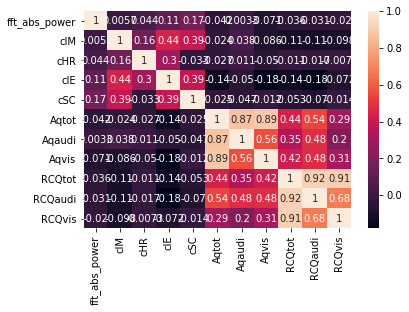

In [74]:
df_beta = df_analysis.loc[df_analysis['brain_oscillation'] == 'Beta']
corrMatrix = df_beta.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

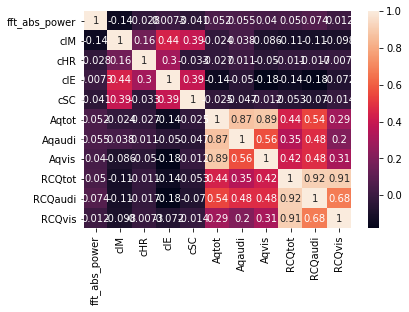

In [76]:
df_delta = df_analysis.loc[df_analysis['brain_oscillation'] == 'Delta']
corrMatrix = df_delta.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

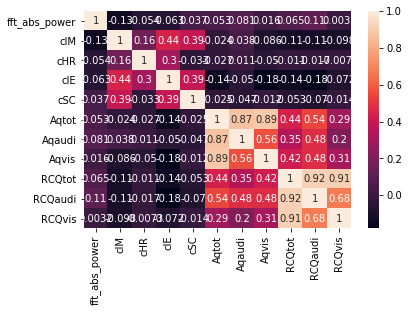

In [77]:
df_theta = df_analysis.loc[df_analysis['brain_oscillation'] == 'Theta']
corrMatrix = df_theta.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

#### Visually, among all correlation matrices we can see that the behavioral data (Attentionnal quotient + Response control quotient) are strongly correlated together but correlated to the cognitive data (cIM - cSC). We can also see that the same is true for the cognitive data, to a lower extent.

### However, eeg data would be better represented on topographical scalp plots.

## this section is not finished. 
https://github.com/hyruuk/hytools/blob/master/hytools/meg_utils.py

In [ ]:
def create_pval_mask(pvals, alpha=0.05):
    mask = np.zeros((len(pvals),), dtype='bool')
    for i, pval in enumerate(pvals):
        if pval <= alpha:
            mask[i] = True
    return mask

In [80]:
def array_topoplot(toplot, ch_xy, showtitle=False, titles=None, savefig=False, figpath=None, vmin=-1, vmax=1, cmap='magma', with_mask=False, masks=None, show=True):
    #create fig
    mask_params = dict(marker='o', markerfacecolor='w', markeredgecolor='k', linewidth=0, markersize=5)
    fig, ax = plt.subplots(1,len(toplot), figsize=(20,10))
    for i, data in enumerate(toplot):
        if with_mask == False:
            image,_ = mne.viz.plot_topomap(data=data, pos=ch_xy, cmap=cmap, vmin=vmin, vmax=vmax, axes=ax[i], show=False, contours=None, extrapolate='box', outlines='head')
        elif with_mask == True:
            image,_ = mne.viz.plot_topomap(data=data, pos=ch_xy, cmap=cmap, vmin=vmin, vmax=vmax, axes=ax[i], show=False, contours=None, mask_params=mask_params, mask=masks[i], extrapolate='box', outlines='head')
        #option for title
        if showtitle == True:
            ax[i].set_title(titles[i], fontdict={'fontsize': 20, 'fontweight': 'heavy'})
    #add a colorbar at the end of the line (weird trick from https://www.martinos.org/mne/stable/auto_tutorials/stats-sensor-space/plot_stats_spatio_temporal_cluster_sensors.html#sphx-glr-auto-tutorials-stats-sensor-space-plot-stats-spatio-temporal-cluster-sensors-py)
    divider = make_axes_locatable(ax[-1])
    ax_colorbar = divider.append_axes('right', size='5%', pad=0.05)
    plt.colorbar(image, cax=ax_colorbar)
    ax_colorbar.tick_params(labelsize=14)
    #save plot if specified
    if savefig == True:
        plt.savefig(figpath, dpi=300)
    if show == True:
        plt.show()
        plt.close(fig=fig)
    else:
        plt.close(fig=fig)
    return fig



In [81]:
# COORDONNÉES À VÉRIFIER [[1,4],[3,4],[1,3],[3,3],[2,3],[1,2],[3,2],[2,2],[1,1],[3,1],[2,1],[1,0],[3,0],[0,3],[4,3],[0,2],[4,2],[0,1],[4,1]]